In [4]:
%pip install optuna

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.cluster import KMeans
import optuna



Note: you may need to restart the kernel to use updated packages.


In [7]:
train_df = pd.read_csv("C:\\Users\\avani\\Downloads\\train.csv")
test_df= pd.read_csv("C:\\Users\\avani\\Desktop\\Projects\\test.csv")
submission_df = pd.DataFrame()
submission_df['id'] = test_df['id']

print(train_df.head())
print(test_df.head())
print(submission_df.head())


features = ['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','O','P']
X_1_train = train_df[features]
X_2_train = train_df.drop(columns= ['Y1', 'Y2', 'N', 'M'])
y_train = train_df[['Y1', 'Y2']]
X_1_test = test_df[features]
X_2_test = test_df.drop(columns= ['id', 'N', 'M'])

print(X_1_train)
print(y_train)





   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N   O  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965 NaN   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401 NaN   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261 NaN   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031 NaN   
4  0.863372 -0.655588 -0.263358 -0.557428 -0.481214  0.083602  0.003087 NaN   

     P        Y1        Y2  
0  NaN -0

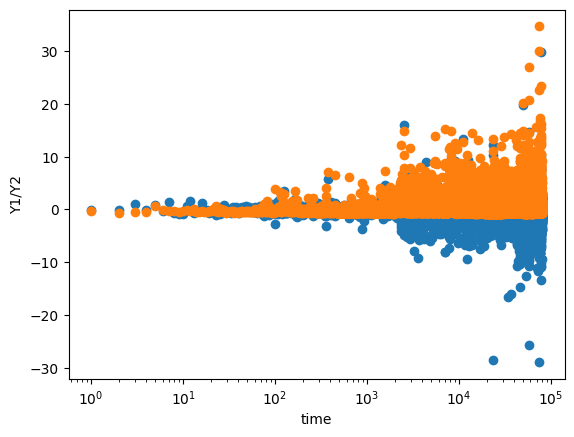

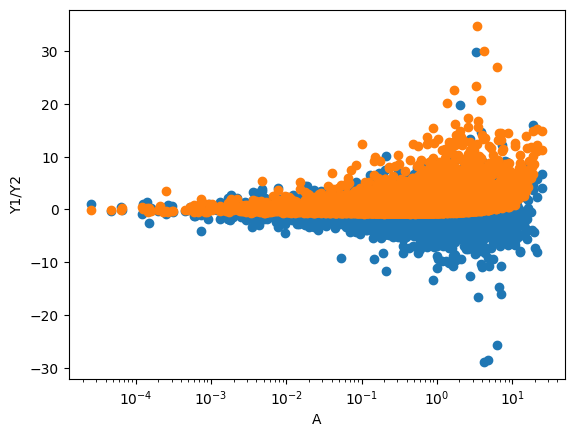

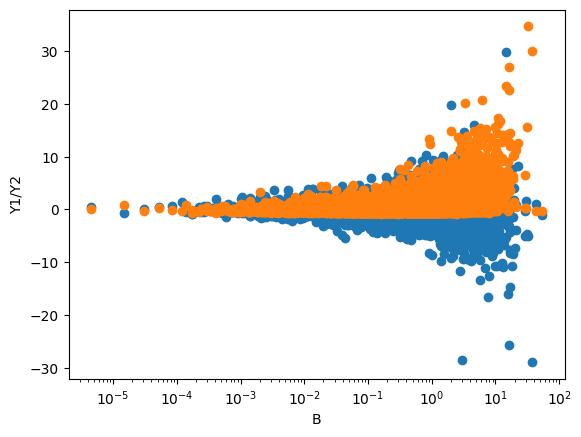

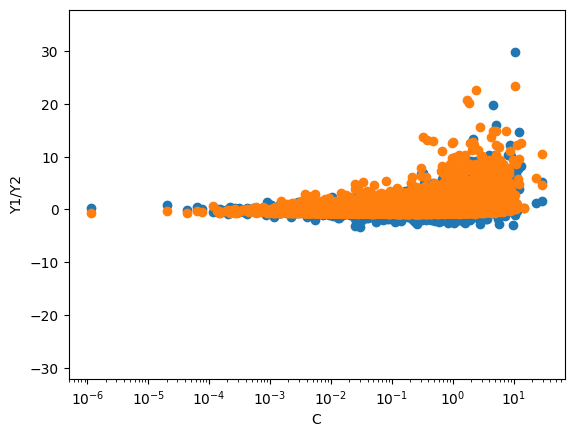

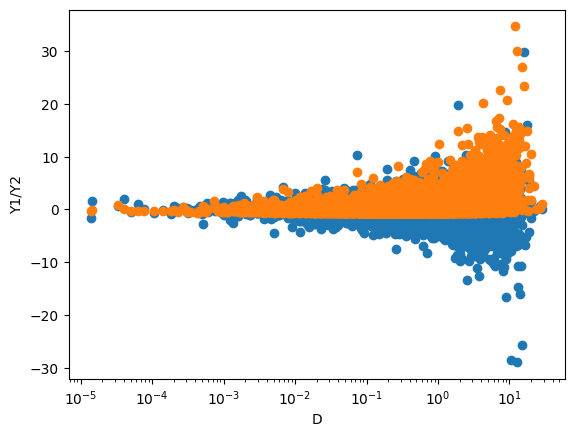

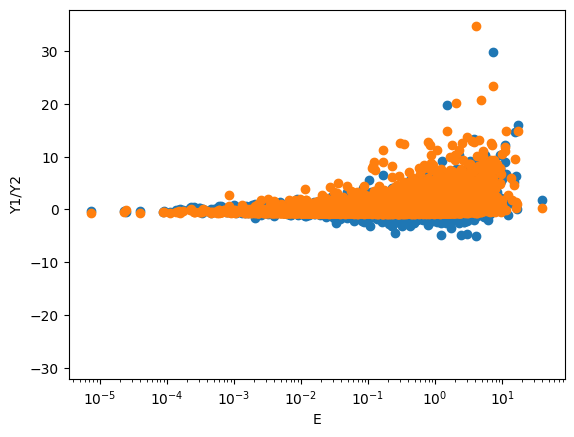

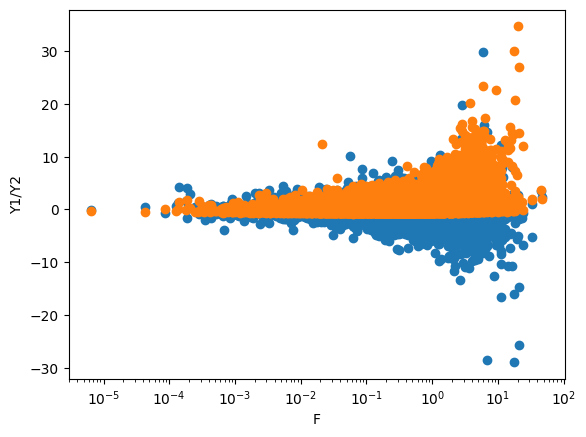

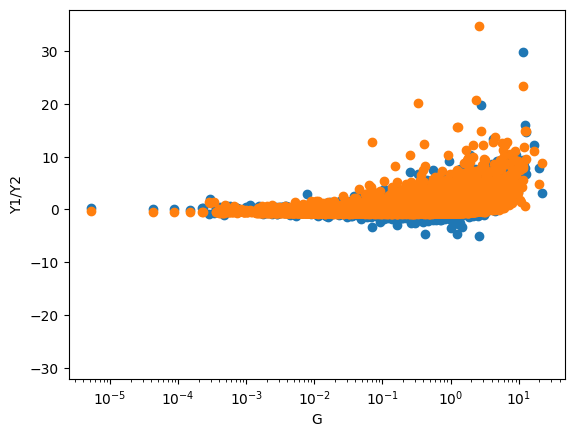

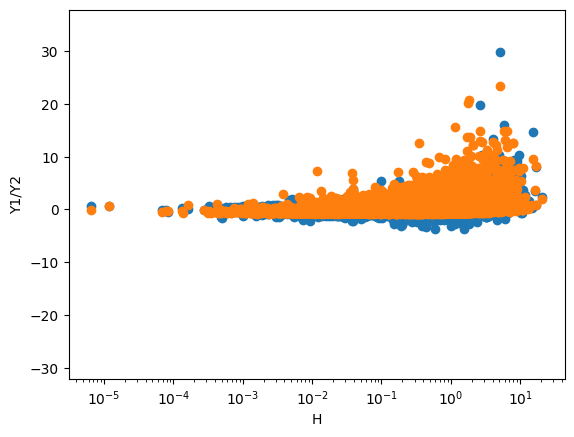

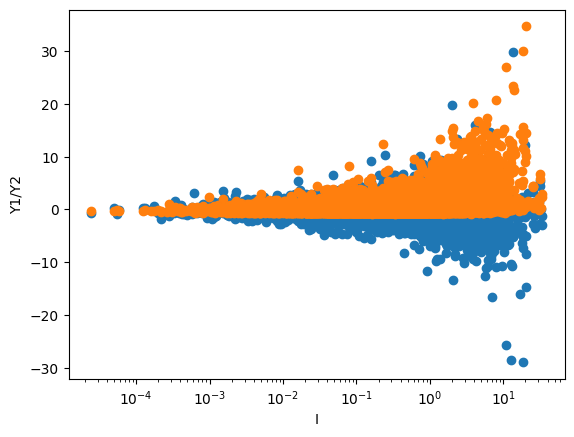

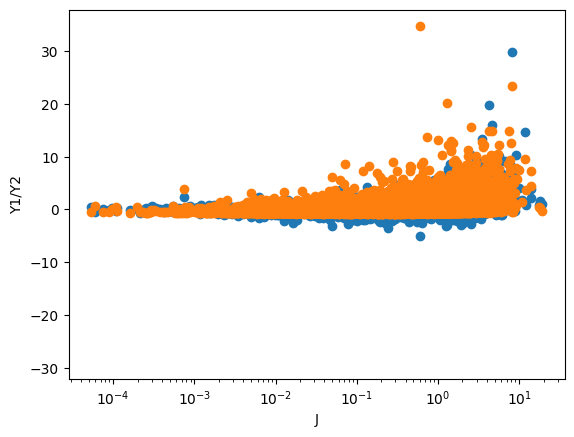

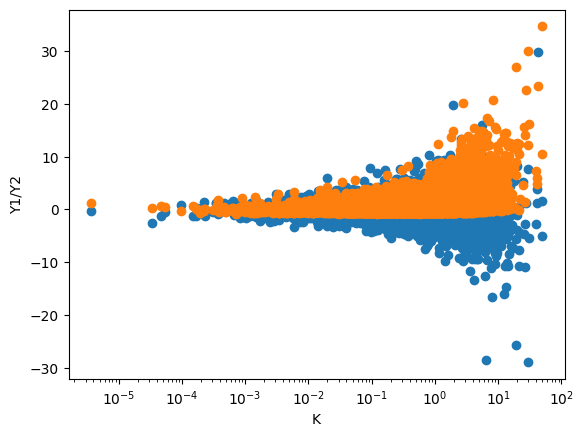

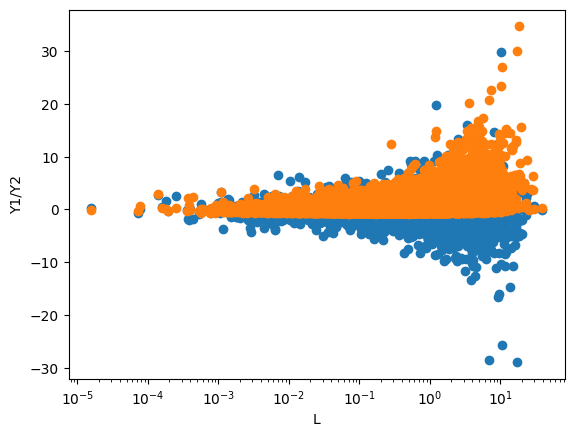

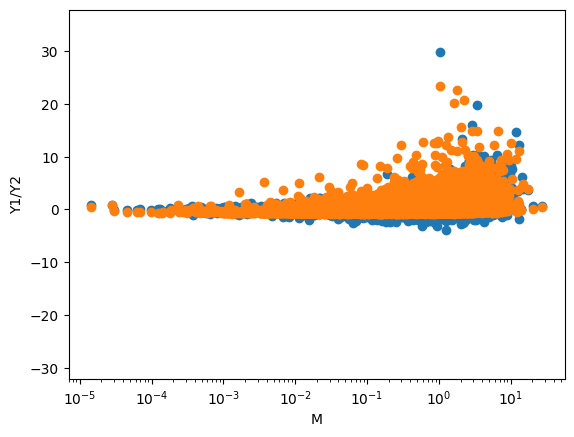

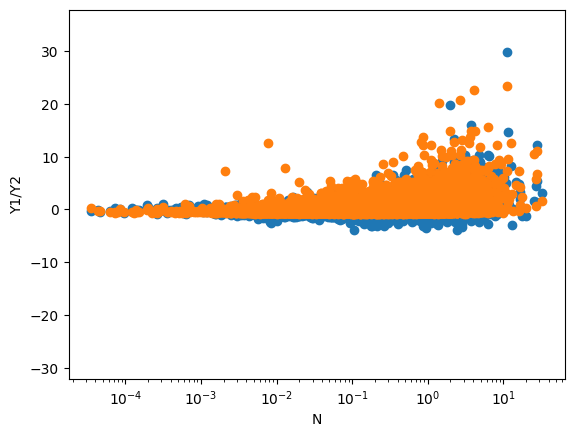

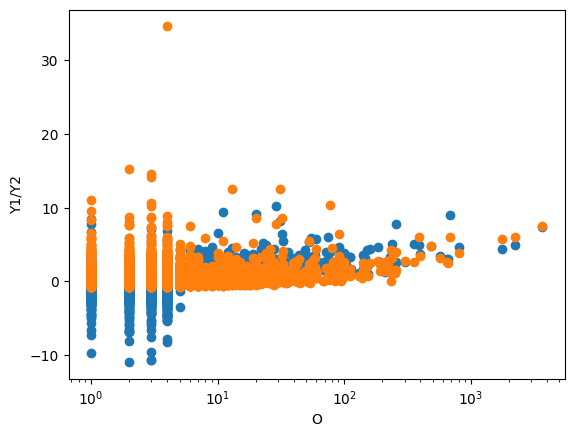

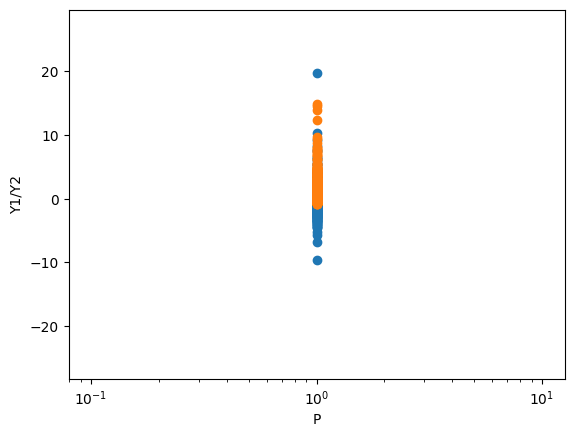

In [16]:
for feature in features:

    plt.scatter(train_df[feature], train_df['Y1'], colorizer="red")
    plt.scatter(train_df[feature], train_df['Y2'], colorizer="blue")
    plt.xlabel(feature)
    plt.ylabel('Y1/Y2')
    plt.xscale('log')
    plt.show()
    

In [ ]:
def objective(trial):
    params = {
        'objective': 'regression_l1',
        'metric': 'l2',
        'n_estimators': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
    }
    model = lgb.LGBMRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_1_train, y_train['Y1'], cv=3, scoring='neg_root_mean_squared_error')
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best R2:", study.best_value)

[I 2025-09-22 15:30:59,385] A new study created in memory with name: no-name-f43be28f-8bba-41af-8f81-cdc83de93e44


[LightGBM] [Warning] lambda_l1 is set=3.73836225255213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.73836225255213
[LightGBM] [Warning] lambda_l2 is set=0.20112510453915766, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20112510453915766
[LightGBM] [Warning] lambda_l1 is set=3.73836225255213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.73836225255213
[LightGBM] [Warning] lambda_l2 is set=0.20112510453915766, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20112510453915766
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-22 15:31:31,266] Trial 0 finished with value: -0.4845163769758967 and parameters: {'learning_rate': 0.06005648147066629, 'num_leaves': 193, 'max_depth': 9, 'min_child_samples': 40, 'subsample': 0.8495993723925984, 'colsample_bytree': 0.7168540660609577, 'lambda_l1': 3.73836225255213, 'lambda_l2': 0.20112510453915766}. Best is trial 0 with value: -0.4845163769758967.


[LightGBM] [Warning] lambda_l1 is set=3.4323753857660257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4323753857660257
[LightGBM] [Warning] lambda_l2 is set=1.1761587704193621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1761587704193621
[LightGBM] [Warning] lambda_l1 is set=3.4323753857660257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4323753857660257
[LightGBM] [Warning] lambda_l2 is set=1.1761587704193621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1761587704193621
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:31:45,633] Trial 1 finished with value: -0.4822275152984039 and parameters: {'learning_rate': 0.022051540948847714, 'num_leaves': 198, 'max_depth': 6, 'min_child_samples': 79, 'subsample': 0.7107877463677397, 'colsample_bytree': 0.6078197472430443, 'lambda_l1': 3.4323753857660257, 'lambda_l2': 1.1761587704193621}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=2.9633645125681163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9633645125681163
[LightGBM] [Warning] lambda_l2 is set=4.198849284573188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.198849284573188
[LightGBM] [Warning] lambda_l1 is set=2.9633645125681163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9633645125681163
[LightGBM] [Warning] lambda_l2 is set=4.198849284573188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.198849284573188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.9633645125681163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.963364512568

[I 2025-09-22 15:32:27,458] Trial 2 finished with value: -0.48357200359617697 and parameters: {'learning_rate': 0.04810009442401692, 'num_leaves': 170, 'max_depth': 0, 'min_child_samples': 11, 'subsample': 0.779403740025551, 'colsample_bytree': 0.7204100780891204, 'lambda_l1': 2.9633645125681163, 'lambda_l2': 4.198849284573188}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=2.051825736321429, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.051825736321429
[LightGBM] [Warning] lambda_l2 is set=1.0102606975831951, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0102606975831951
[LightGBM] [Warning] lambda_l1 is set=2.051825736321429, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.051825736321429
[LightGBM] [Warning] lambda_l2 is set=1.0102606975831951, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0102606975831951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-09-22 15:34:45,903] Trial 3 finished with value: -0.48377030792718473 and parameters: {'learning_rate': 0.020868515216934103, 'num_leaves': 157, 'max_depth': 17, 'min_child_samples': 64, 'subsample': 0.6319627959275113, 'colsample_bytree': 0.9856097593416171, 'lambda_l1': 2.051825736321429, 'lambda_l2': 1.0102606975831951}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.6100085976457166, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6100085976457166
[LightGBM] [Warning] lambda_l2 is set=1.0086077917310603, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0086077917310603
[LightGBM] [Warning] lambda_l1 is set=3.6100085976457166, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6100085976457166
[LightGBM] [Warning] lambda_l2 is set=1.0086077917310603, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0086077917310603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:34:54,734] Trial 4 finished with value: -0.4831364122335784 and parameters: {'learning_rate': 0.10241034216424906, 'num_leaves': 53, 'max_depth': 2, 'min_child_samples': 42, 'subsample': 0.9000674801807285, 'colsample_bytree': 0.8606355697064598, 'lambda_l1': 3.6100085976457166, 'lambda_l2': 1.0086077917310603}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=4.5181445169186265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5181445169186265
[LightGBM] [Warning] lambda_l2 is set=3.0605341899418477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0605341899418477
[LightGBM] [Warning] lambda_l1 is set=4.5181445169186265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5181445169186265
[LightGBM] [Warning] lambda_l2 is set=3.0605341899418477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0605341899418477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:35:13,640] Trial 5 finished with value: -0.488740721260615 and parameters: {'learning_rate': 0.19065417195555753, 'num_leaves': 67, 'max_depth': 9, 'min_child_samples': 37, 'subsample': 0.6176409707531633, 'colsample_bytree': 0.80059832248845, 'lambda_l1': 4.5181445169186265, 'lambda_l2': 3.0605341899418477}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=1.8646806164204144, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8646806164204144
[LightGBM] [Warning] lambda_l2 is set=0.5954680041165195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5954680041165195
[LightGBM] [Warning] lambda_l1 is set=1.8646806164204144, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8646806164204144
[LightGBM] [Warning] lambda_l2 is set=0.5954680041165195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5954680041165195
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:35:36,324] Trial 6 finished with value: -0.4854101641152992 and parameters: {'learning_rate': 0.10673381388605209, 'num_leaves': 172, 'max_depth': 8, 'min_child_samples': 47, 'subsample': 0.8030402445488994, 'colsample_bytree': 0.6714282724508878, 'lambda_l1': 1.8646806164204144, 'lambda_l2': 0.5954680041165195}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.3696427469652077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3696427469652077
[LightGBM] [Warning] lambda_l2 is set=3.880450559737805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.880450559737805
[LightGBM] [Warning] lambda_l1 is set=3.3696427469652077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3696427469652077
[LightGBM] [Warning] lambda_l2 is set=3.880450559737805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.880450559737805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-09-22 15:36:08,780] Trial 7 finished with value: -0.4834403723806367 and parameters: {'learning_rate': 0.02718903225674288, 'num_leaves': 136, 'max_depth': 13, 'min_child_samples': 91, 'subsample': 0.7453213101881061, 'colsample_bytree': 0.7442440973025365, 'lambda_l1': 3.3696427469652077, 'lambda_l2': 3.880450559737805}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=1.8906858985860897, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8906858985860897
[LightGBM] [Warning] lambda_l2 is set=0.8945933313981119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8945933313981119
[LightGBM] [Warning] lambda_l1 is set=1.8906858985860897, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8906858985860897
[LightGBM] [Warning] lambda_l2 is set=0.8945933313981119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8945933313981119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:36:19,713] Trial 8 finished with value: -0.48505097334768177 and parameters: {'learning_rate': 0.1535980445093749, 'num_leaves': 133, 'max_depth': 3, 'min_child_samples': 93, 'subsample': 0.9583721696959153, 'colsample_bytree': 0.8284858521294748, 'lambda_l1': 1.8906858985860897, 'lambda_l2': 0.8945933313981119}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=1.430842146056817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.430842146056817
[LightGBM] [Warning] lambda_l2 is set=4.642553722189576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.642553722189576
[LightGBM] [Warning] lambda_l1 is set=1.430842146056817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.430842146056817
[LightGBM] [Warning] lambda_l2 is set=4.642553722189576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.642553722189576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-09-22 15:36:44,530] Trial 9 finished with value: -0.49006430575329746 and parameters: {'learning_rate': 0.17783503403418177, 'num_leaves': 96, 'max_depth': 15, 'min_child_samples': 79, 'subsample': 0.764828024152881, 'colsample_bytree': 0.8113437727622677, 'lambda_l1': 1.430842146056817, 'lambda_l2': 4.642553722189576}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=0.36129925963521226, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36129925963521226
[LightGBM] [Warning] lambda_l2 is set=1.9716165485596449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9716165485596449
[LightGBM] [Warning] lambda_l1 is set=0.36129925963521226, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36129925963521226
[LightGBM] [Warning] lambda_l2 is set=1.9716165485596449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9716165485596449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-09-22 15:37:09,242] Trial 10 finished with value: -0.4862629899049655 and parameters: {'learning_rate': 0.09493765767395387, 'num_leaves': 97, 'max_depth': 19, 'min_child_samples': 69, 'subsample': 0.6816347282251483, 'colsample_bytree': 0.6219850037767648, 'lambda_l1': 0.36129925963521226, 'lambda_l2': 1.9716165485596449}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=4.6246123469423175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6246123469423175
[LightGBM] [Warning] lambda_l2 is set=2.0565541320324137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0565541320324137
[LightGBM] [Warning] lambda_l1 is set=4.6246123469423175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6246123469423175
[LightGBM] [Warning] lambda_l2 is set=2.0565541320324137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0565541320324137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:37:20,049] Trial 11 finished with value: -0.483252183754951 and parameters: {'learning_rate': 0.11758693754769793, 'num_leaves': 23, 'max_depth': 3, 'min_child_samples': 21, 'subsample': 0.9046906894023004, 'colsample_bytree': 0.8805747055153502, 'lambda_l1': 4.6246123469423175, 'lambda_l2': 2.0565541320324137}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.9844773210201327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9844773210201327
[LightGBM] [Warning] lambda_l2 is set=1.4713317468390747, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4713317468390747
[LightGBM] [Warning] lambda_l1 is set=3.9844773210201327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9844773210201327
[LightGBM] [Warning] lambda_l2 is set=1.4713317468390747, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4713317468390747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:37:33,196] Trial 12 finished with value: -0.48522063125972564 and parameters: {'learning_rate': 0.08097873055966161, 'num_leaves': 47, 'max_depth': 5, 'min_child_samples': 57, 'subsample': 0.9991566933381949, 'colsample_bytree': 0.9101312902333871, 'lambda_l1': 3.9844773210201327, 'lambda_l2': 1.4713317468390747}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=2.6576052169762945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6576052169762945
[LightGBM] [Warning] lambda_l2 is set=2.7586674468692305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7586674468692305
[LightGBM] [Warning] lambda_l1 is set=2.6576052169762945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6576052169762945
[LightGBM] [Warning] lambda_l2 is set=2.7586674468692305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7586674468692305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.6576052169762945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.65760521

[I 2025-09-22 15:37:53,315] Trial 13 finished with value: -0.4850285372185505 and parameters: {'learning_rate': 0.12784250134329841, 'num_leaves': 70, 'max_depth': -1, 'min_child_samples': 77, 'subsample': 0.8760343699406106, 'colsample_bytree': 0.6164820848478554, 'lambda_l1': 2.6576052169762945, 'lambda_l2': 2.7586674468692305}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.4310402187264852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4310402187264852
[LightGBM] [Warning] lambda_l2 is set=0.07470620894116164, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07470620894116164
[LightGBM] [Warning] lambda_l1 is set=3.4310402187264852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4310402187264852
[LightGBM] [Warning] lambda_l2 is set=0.07470620894116164, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07470620894116164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-09-22 15:38:07,125] Trial 14 finished with value: -0.48294748373757734 and parameters: {'learning_rate': 0.06578030366561242, 'num_leaves': 115, 'max_depth': 5, 'min_child_samples': 32, 'subsample': 0.7114267817169316, 'colsample_bytree': 0.9500111366697235, 'lambda_l1': 3.4310402187264852, 'lambda_l2': 0.07470620894116164}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=4.963654980329642, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.963654980329642
[LightGBM] [Warning] lambda_l2 is set=1.60763978759195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.60763978759195
[LightGBM] [Warning] lambda_l1 is set=4.963654980329642, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.963654980329642
[LightGBM] [Warning] lambda_l2 is set=1.60763978759195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.60763978759195
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-22 15:38:27,370] Trial 15 finished with value: -0.48529247527032027 and parameters: {'learning_rate': 0.010086218648059244, 'num_leaves': 199, 'max_depth': 6, 'min_child_samples': 26, 'subsample': 0.6850194557989764, 'colsample_bytree': 0.9629995004925332, 'lambda_l1': 4.963654980329642, 'lambda_l2': 1.60763978759195}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.040845664066389, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.040845664066389
[LightGBM] [Warning] lambda_l2 is set=0.10230403345996779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10230403345996779
[LightGBM] [Warning] lambda_l1 is set=3.040845664066389, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.040845664066389
[LightGBM] [Warning] lambda_l2 is set=0.10230403345996779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10230403345996779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:38:40,693] Trial 16 finished with value: -0.4841642948144591 and parameters: {'learning_rate': 0.0581602896724123, 'num_leaves': 124, 'max_depth': 5, 'min_child_samples': 54, 'subsample': 0.7112665352001762, 'colsample_bytree': 0.9222598070293664, 'lambda_l1': 3.040845664066389, 'lambda_l2': 0.10230403345996779}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=4.150287147969931, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.150287147969931
[LightGBM] [Warning] lambda_l2 is set=0.46113562787521944, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.46113562787521944
[LightGBM] [Warning] lambda_l1 is set=4.150287147969931, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.150287147969931
[LightGBM] [Warning] lambda_l2 is set=0.46113562787521944, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.46113562787521944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:39:14,370] Trial 17 finished with value: -0.4835613053131154 and parameters: {'learning_rate': 0.03954714573316939, 'num_leaves': 148, 'max_depth': 12, 'min_child_samples': 30, 'subsample': 0.8185755433643669, 'colsample_bytree': 0.7643304224201672, 'lambda_l1': 4.150287147969931, 'lambda_l2': 0.46113562787521944}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=1.0417008045953864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0417008045953864
[LightGBM] [Warning] lambda_l2 is set=1.4316724120132591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4316724120132591
[LightGBM] [Warning] lambda_l1 is set=1.0417008045953864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0417008045953864
[LightGBM] [Warning] lambda_l2 is set=1.4316724120132591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4316724120132591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:39:39,672] Trial 18 finished with value: -0.48594175504485837 and parameters: {'learning_rate': 0.07398669167017817, 'num_leaves': 107, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.7272127961436775, 'colsample_bytree': 0.6727009839267177, 'lambda_l1': 1.0417008045953864, 'lambda_l2': 1.4316724120132591}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=2.484169521211946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.484169521211946
[LightGBM] [Warning] lambda_l2 is set=3.2730441696630796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2730441696630796
[LightGBM] [Warning] lambda_l1 is set=2.484169521211946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.484169521211946
[LightGBM] [Warning] lambda_l2 is set=3.2730441696630796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2730441696630796
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-09-22 15:39:59,054] Trial 19 finished with value: -0.4842168846410477 and parameters: {'learning_rate': 0.03703987003185183, 'num_leaves': 175, 'max_depth': 7, 'min_child_samples': 80, 'subsample': 0.6516296037810023, 'colsample_bytree': 0.9995492848546476, 'lambda_l1': 2.484169521211946, 'lambda_l2': 3.2730441696630796}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.1965259705786835, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1965259705786835
[LightGBM] [Warning] lambda_l2 is set=2.4584583185336246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4584583185336246
[LightGBM] [Warning] lambda_l1 is set=3.1965259705786835, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1965259705786835
[LightGBM] [Warning] lambda_l2 is set=2.4584583185336246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4584583185336246
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-09-22 15:40:22,764] Trial 20 finished with value: -0.48301829085036047 and parameters: {'learning_rate': 0.07361060478441299, 'num_leaves': 84, 'max_depth': 11, 'min_child_samples': 14, 'subsample': 0.6733307196871806, 'colsample_bytree': 0.9415433071806265, 'lambda_l1': 3.1965259705786835, 'lambda_l2': 2.4584583185336246}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=3.0722657846048884, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0722657846048884
[LightGBM] [Warning] lambda_l2 is set=2.170375743038477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.170375743038477
[LightGBM] [Warning] lambda_l1 is set=3.0722657846048884, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0722657846048884
[LightGBM] [Warning] lambda_l2 is set=2.170375743038477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.170375743038477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-09-22 15:40:56,656] Trial 21 finished with value: -0.48344045437692734 and parameters: {'learning_rate': 0.07467119092741532, 'num_leaves': 83, 'max_depth': 11, 'min_child_samples': 14, 'subsample': 0.6718471421267761, 'colsample_bytree': 0.9430222256975445, 'lambda_l1': 3.0722657846048884, 'lambda_l2': 2.170375743038477}. Best is trial 1 with value: -0.4822275152984039.


[LightGBM] [Warning] lambda_l1 is set=2.5964107006157384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5964107006157384
[LightGBM] [Warning] lambda_l2 is set=2.572379878419301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.572379878419301
[LightGBM] [Warning] lambda_l1 is set=2.5964107006157384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5964107006157384
[LightGBM] [Warning] lambda_l2 is set=2.572379878419301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.572379878419301
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.5964107006157384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.596410700615

[I 2025-09-22 15:41:13,606] Trial 22 finished with value: -0.4816496163161877 and parameters: {'learning_rate': 0.056021440436577766, 'num_leaves': 39, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.7065852167839848, 'colsample_bytree': 0.8782950020697383, 'lambda_l1': 2.5964107006157384, 'lambda_l2': 2.572379878419301}. Best is trial 22 with value: -0.4816496163161877.


[LightGBM] [Warning] lambda_l1 is set=2.3573649345171783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3573649345171783
[LightGBM] [Warning] lambda_l2 is set=3.534863977863867, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.534863977863867
[LightGBM] [Warning] lambda_l1 is set=2.3573649345171783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3573649345171783
[LightGBM] [Warning] lambda_l2 is set=3.534863977863867, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.534863977863867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-09-22 15:41:28,201] Trial 23 finished with value: -0.48332038579547515 and parameters: {'learning_rate': 0.05621273118609876, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 32, 'subsample': 0.7174311874204791, 'colsample_bytree': 0.879016671446229, 'lambda_l1': 2.3573649345171783, 'lambda_l2': 3.534863977863867}. Best is trial 22 with value: -0.4816496163161877.


[LightGBM] [Warning] lambda_l1 is set=3.6560304996918047, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6560304996918047
[LightGBM] [Warning] lambda_l2 is set=2.697329454156602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.697329454156602
[LightGBM] [Warning] lambda_l1 is set=3.6560304996918047, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6560304996918047
[LightGBM] [Warning] lambda_l2 is set=2.697329454156602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.697329454156602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-09-22 15:41:52,011] Trial 24 finished with value: -0.48160819081191725 and parameters: {'learning_rate': 0.028800260111055978, 'num_leaves': 118, 'max_depth': 7, 'min_child_samples': 22, 'subsample': 0.7568954715389208, 'colsample_bytree': 0.8484407819955156, 'lambda_l1': 3.6560304996918047, 'lambda_l2': 2.697329454156602}. Best is trial 24 with value: -0.48160819081191725.


[LightGBM] [Warning] lambda_l1 is set=4.076340446814381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.076340446814381
[LightGBM] [Warning] lambda_l2 is set=2.676414249134783, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.676414249134783
[LightGBM] [Warning] lambda_l1 is set=4.076340446814381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.076340446814381
[LightGBM] [Warning] lambda_l2 is set=2.676414249134783, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.676414249134783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-09-22 15:42:30,747] Trial 25 finished with value: -0.4827624556345686 and parameters: {'learning_rate': 0.019521059482329798, 'num_leaves': 151, 'max_depth': 14, 'min_child_samples': 22, 'subsample': 0.7574262865016691, 'colsample_bytree': 0.8414224173242866, 'lambda_l1': 4.076340446814381, 'lambda_l2': 2.676414249134783}. Best is trial 24 with value: -0.48160819081191725.


[LightGBM] [Warning] lambda_l1 is set=2.766222262836197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.766222262836197
[LightGBM] [Warning] lambda_l2 is set=2.968232969863241, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.968232969863241
[LightGBM] [Warning] lambda_l1 is set=2.766222262836197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.766222262836197
[LightGBM] [Warning] lambda_l2 is set=2.968232969863241, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.968232969863241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.766222262836197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.766222262836197
[

[I 2025-09-22 15:42:45,190] Trial 26 finished with value: -0.48128670683045743 and parameters: {'learning_rate': 0.0373724108799283, 'num_leaves': 24, 'max_depth': 10, 'min_child_samples': 54, 'subsample': 0.830298440284603, 'colsample_bytree': 0.77096075000284, 'lambda_l1': 2.766222262836197, 'lambda_l2': 2.968232969863241}. Best is trial 26 with value: -0.48128670683045743.


[LightGBM] [Warning] lambda_l1 is set=2.8059747336446175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8059747336446175
[LightGBM] [Warning] lambda_l2 is set=3.0328663833040426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0328663833040426
[LightGBM] [Warning] lambda_l1 is set=2.8059747336446175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8059747336446175
[LightGBM] [Warning] lambda_l2 is set=3.0328663833040426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0328663833040426
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.8059747336446175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.80597473

[I 2025-09-22 15:42:59,370] Trial 27 finished with value: -0.4809772993911097 and parameters: {'learning_rate': 0.04177271636309698, 'num_leaves': 24, 'max_depth': 16, 'min_child_samples': 49, 'subsample': 0.8484394939770759, 'colsample_bytree': 0.7877343057768762, 'lambda_l1': 2.8059747336446175, 'lambda_l2': 3.0328663833040426}. Best is trial 27 with value: -0.4809772993911097.


[LightGBM] [Warning] lambda_l1 is set=2.790802036632222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.790802036632222
[LightGBM] [Warning] lambda_l2 is set=3.6855727178008912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6855727178008912
[LightGBM] [Warning] lambda_l1 is set=2.790802036632222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.790802036632222
[LightGBM] [Warning] lambda_l2 is set=3.6855727178008912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6855727178008912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.790802036632222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7908020366322

[I 2025-09-22 15:43:14,832] Trial 28 finished with value: -0.4812426546534397 and parameters: {'learning_rate': 0.039252193803426476, 'num_leaves': 29, 'max_depth': 16, 'min_child_samples': 49, 'subsample': 0.8367745902439518, 'colsample_bytree': 0.7726171156074086, 'lambda_l1': 2.790802036632222, 'lambda_l2': 3.6855727178008912}. Best is trial 27 with value: -0.4809772993911097.


[LightGBM] [Warning] lambda_l1 is set=1.5605026926428982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5605026926428982
[LightGBM] [Warning] lambda_l2 is set=4.911395864604015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.911395864604015
[LightGBM] [Warning] lambda_l1 is set=1.5605026926428982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5605026926428982
[LightGBM] [Warning] lambda_l2 is set=4.911395864604015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.911395864604015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=1.5605026926428982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.560502692642

[I 2025-09-22 15:43:28,765] Trial 29 finished with value: -0.48154343765696056 and parameters: {'learning_rate': 0.04324084236099368, 'num_leaves': 21, 'max_depth': 16, 'min_child_samples': 49, 'subsample': 0.8449401138893102, 'colsample_bytree': 0.7752934838288494, 'lambda_l1': 1.5605026926428982, 'lambda_l2': 4.911395864604015}. Best is trial 27 with value: -0.4809772993911097.


[LightGBM] [Warning] lambda_l1 is set=2.2755792838272546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2755792838272546
[LightGBM] [Warning] lambda_l2 is set=3.7502235460518336, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7502235460518336
[LightGBM] [Warning] lambda_l1 is set=2.2755792838272546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2755792838272546
[LightGBM] [Warning] lambda_l2 is set=3.7502235460518336, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7502235460518336
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.2755792838272546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.27557928

[I 2025-09-22 15:43:43,548] Trial 30 finished with value: -0.4840381082621623 and parameters: {'learning_rate': 0.08918968815011885, 'num_leaves': 30, 'max_depth': 20, 'min_child_samples': 61, 'subsample': 0.8377425228700264, 'colsample_bytree': 0.7048551106045045, 'lambda_l1': 2.2755792838272546, 'lambda_l2': 3.7502235460518336}. Best is trial 27 with value: -0.4809772993911097.


[LightGBM] [Warning] lambda_l1 is set=1.2311625446347851, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2311625446347851
[LightGBM] [Warning] lambda_l2 is set=4.971754503439771, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.971754503439771
[LightGBM] [Warning] lambda_l1 is set=1.2311625446347851, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2311625446347851
[LightGBM] [Warning] lambda_l2 is set=4.971754503439771, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.971754503439771
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=1.2311625446347851, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.231162544634

[I 2025-09-22 15:43:56,809] Trial 31 finished with value: -0.4806054668387338 and parameters: {'learning_rate': 0.04342367249532687, 'num_leaves': 20, 'max_depth': 16, 'min_child_samples': 47, 'subsample': 0.865286790476226, 'colsample_bytree': 0.7731695591382525, 'lambda_l1': 1.2311625446347851, 'lambda_l2': 4.971754503439771}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=0.7190425632791804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7190425632791804
[LightGBM] [Warning] lambda_l2 is set=4.363373223075329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.363373223075329
[LightGBM] [Warning] lambda_l1 is set=0.7190425632791804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7190425632791804
[LightGBM] [Warning] lambda_l2 is set=4.363373223075329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.363373223075329
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.7190425632791804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.719042563279

[I 2025-09-22 15:44:16,003] Trial 32 finished with value: -0.4812901162539407 and parameters: {'learning_rate': 0.04679469836631479, 'num_leaves': 55, 'max_depth': 18, 'min_child_samples': 46, 'subsample': 0.8763043713127927, 'colsample_bytree': 0.767615440499438, 'lambda_l1': 0.7190425632791804, 'lambda_l2': 4.363373223075329}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=2.659521887028639, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.659521887028639
[LightGBM] [Warning] lambda_l2 is set=3.170365976214669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.170365976214669
[LightGBM] [Warning] lambda_l1 is set=2.659521887028639, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.659521887028639
[LightGBM] [Warning] lambda_l2 is set=3.170365976214669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.170365976214669
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.659521887028639, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.659521887028639
[

[I 2025-09-22 15:44:33,857] Trial 33 finished with value: -0.4837953911465422 and parameters: {'learning_rate': 0.011478857674615893, 'num_leaves': 36, 'max_depth': 16, 'min_child_samples': 51, 'subsample': 0.8707886715027693, 'colsample_bytree': 0.7434688077827218, 'lambda_l1': 2.659521887028639, 'lambda_l2': 3.170365976214669}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=2.10848890029398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.10848890029398
[LightGBM] [Warning] lambda_l2 is set=4.123675331628479, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.123675331628479
[LightGBM] [Warning] lambda_l1 is set=2.10848890029398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.10848890029398
[LightGBM] [Warning] lambda_l2 is set=4.123675331628479, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.123675331628479
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=2.10848890029398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.10848890029398
[LightG

[I 2025-09-22 15:44:48,070] Trial 34 finished with value: -0.4807836598339845 and parameters: {'learning_rate': 0.03478983662009681, 'num_leaves': 25, 'max_depth': 14, 'min_child_samples': 38, 'subsample': 0.9284750349783732, 'colsample_bytree': 0.7851445395137675, 'lambda_l1': 2.10848890029398, 'lambda_l2': 4.123675331628479}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=1.3704246702892302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3704246702892302
[LightGBM] [Warning] lambda_l2 is set=4.1241950669621135, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1241950669621135
[LightGBM] [Warning] lambda_l1 is set=1.3704246702892302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3704246702892302
[LightGBM] [Warning] lambda_l2 is set=4.1241950669621135, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1241950669621135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=1.3704246702892302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.37042467

[I 2025-09-22 15:45:05,928] Trial 35 finished with value: -0.48064850136394827 and parameters: {'learning_rate': 0.032145178195691626, 'num_leaves': 46, 'max_depth': 18, 'min_child_samples': 40, 'subsample': 0.9267611307803134, 'colsample_bytree': 0.8155953360199357, 'lambda_l1': 1.3704246702892302, 'lambda_l2': 4.1241950669621135}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=1.2683359795870985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2683359795870985
[LightGBM] [Warning] lambda_l2 is set=4.218888152154682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.218888152154682
[LightGBM] [Warning] lambda_l1 is set=1.2683359795870985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2683359795870985
[LightGBM] [Warning] lambda_l2 is set=4.218888152154682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.218888152154682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=1.2683359795870985, reg_al

[I 2025-09-22 15:45:25,523] Trial 36 finished with value: -0.48074343316465495 and parameters: {'learning_rate': 0.02884899444830049, 'num_leaves': 48, 'max_depth': 18, 'min_child_samples': 41, 'subsample': 0.9481825701444264, 'colsample_bytree': 0.819865091352836, 'lambda_l1': 1.2683359795870985, 'lambda_l2': 4.218888152154682}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=1.243002577118628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.243002577118628
[LightGBM] [Warning] lambda_l2 is set=4.13896310443252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.13896310443252
[LightGBM] [Warning] lambda_l1 is set=1.243002577118628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.243002577118628
[LightGBM] [Warning] lambda_l2 is set=4.13896310443252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.13896310443252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=1.243002577118628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.243002577118628
[Ligh

[I 2025-09-22 15:45:47,879] Trial 37 finished with value: -0.4807849642573787 and parameters: {'learning_rate': 0.025590655553104937, 'num_leaves': 62, 'max_depth': 18, 'min_child_samples': 39, 'subsample': 0.9395320124282213, 'colsample_bytree': 0.8172732442860036, 'lambda_l1': 1.243002577118628, 'lambda_l2': 4.13896310443252}. Best is trial 31 with value: -0.4806054668387338.


[LightGBM] [Warning] lambda_l1 is set=0.7568149267217921, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7568149267217921
[LightGBM] [Warning] lambda_l2 is set=4.905624469856894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.905624469856894
[LightGBM] [Warning] lambda_l1 is set=0.7568149267217921, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7568149267217921
[LightGBM] [Warning] lambda_l2 is set=4.905624469856894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.905624469856894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.7568149267217921, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.756814926721

[I 2025-09-22 15:46:20,679] Trial 38 finished with value: -0.48024530956803263 and parameters: {'learning_rate': 0.0186976008977349, 'num_leaves': 47, 'max_depth': 20, 'min_child_samples': 41, 'subsample': 0.930300728775031, 'colsample_bytree': 0.7269787767387658, 'lambda_l1': 0.7568149267217921, 'lambda_l2': 4.905624469856894}. Best is trial 38 with value: -0.48024530956803263.


[LightGBM] [Warning] lambda_l1 is set=0.1053298232530211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1053298232530211
[LightGBM] [Warning] lambda_l2 is set=4.962347125304679, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.962347125304679
[LightGBM] [Warning] lambda_l1 is set=0.1053298232530211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1053298232530211
[LightGBM] [Warning] lambda_l2 is set=4.962347125304679, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.962347125304679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.1053298232530211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.105329823253

[I 2025-09-22 15:47:21,116] Trial 39 finished with value: -0.48073288635637695 and parameters: {'learning_rate': 0.017461626134846073, 'num_leaves': 51, 'max_depth': 20, 'min_child_samples': 45, 'subsample': 0.9894255170993076, 'colsample_bytree': 0.7154160128218593, 'lambda_l1': 0.1053298232530211, 'lambda_l2': 4.962347125304679}. Best is trial 38 with value: -0.48024530956803263.


[LightGBM] [Warning] lambda_l1 is set=0.035898597043866165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035898597043866165
[LightGBM] [Warning] lambda_l2 is set=4.91800088078222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.91800088078222
[LightGBM] [Warning] lambda_l1 is set=0.035898597043866165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035898597043866165
[LightGBM] [Warning] lambda_l2 is set=4.91800088078222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.91800088078222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.035898597043866165, 

[I 2025-09-22 15:48:59,303] Trial 40 finished with value: -0.48041215363454176 and parameters: {'learning_rate': 0.018800650192689845, 'num_leaves': 79, 'max_depth': 20, 'min_child_samples': 43, 'subsample': 0.9779635061168216, 'colsample_bytree': 0.7007312603352656, 'lambda_l1': 0.035898597043866165, 'lambda_l2': 4.91800088078222}. Best is trial 38 with value: -0.48024530956803263.


[LightGBM] [Warning] lambda_l1 is set=0.004753578430571448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004753578430571448
[LightGBM] [Warning] lambda_l2 is set=4.828099417079731, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.828099417079731
[LightGBM] [Warning] lambda_l1 is set=0.004753578430571448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004753578430571448
[LightGBM] [Warning] lambda_l2 is set=4.828099417079731, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.828099417079731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.004753578430571448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00

[I 2025-09-22 15:49:52,938] Trial 41 finished with value: -0.47962927666528304 and parameters: {'learning_rate': 0.018938341430103204, 'num_leaves': 79, 'max_depth': 20, 'min_child_samples': 44, 'subsample': 0.9821336424550697, 'colsample_bytree': 0.7036181008641559, 'lambda_l1': 0.004753578430571448, 'lambda_l2': 4.828099417079731}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.6929624790108355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6929624790108355
[LightGBM] [Warning] lambda_l2 is set=4.668929392294777, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.668929392294777
[LightGBM] [Warning] lambda_l1 is set=0.6929624790108355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6929624790108355
[LightGBM] [Warning] lambda_l2 is set=4.668929392294777, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.668929392294777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.6929624790108355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.692962479010

[I 2025-09-22 15:50:17,655] Trial 42 finished with value: -0.4801467273400697 and parameters: {'learning_rate': 0.017507516044981835, 'num_leaves': 74, 'max_depth': 19, 'min_child_samples': 35, 'subsample': 0.976325776025114, 'colsample_bytree': 0.6703207251105063, 'lambda_l1': 0.6929624790108355, 'lambda_l2': 4.668929392294777}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.5000864272530339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5000864272530339
[LightGBM] [Warning] lambda_l2 is set=4.653340462349971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653340462349971
[LightGBM] [Warning] lambda_l1 is set=0.5000864272530339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5000864272530339
[LightGBM] [Warning] lambda_l2 is set=4.653340462349971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653340462349971
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.5000864272530339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.500086427253

[I 2025-09-22 15:50:42,631] Trial 43 finished with value: -0.47986292932129976 and parameters: {'learning_rate': 0.018321156797525797, 'num_leaves': 77, 'max_depth': 20, 'min_child_samples': 35, 'subsample': 0.9726129485442795, 'colsample_bytree': 0.67693976638523, 'lambda_l1': 0.5000864272530339, 'lambda_l2': 4.653340462349971}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.515557870244717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.515557870244717
[LightGBM] [Warning] lambda_l2 is set=4.547625435853662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.547625435853662
[LightGBM] [Warning] lambda_l1 is set=0.515557870244717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.515557870244717
[LightGBM] [Warning] lambda_l2 is set=4.547625435853662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.547625435853662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.515557870244717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.515557870244717
[

[I 2025-09-22 15:51:06,030] Trial 44 finished with value: -0.48060122424688845 and parameters: {'learning_rate': 0.016432777835504665, 'num_leaves': 76, 'max_depth': 20, 'min_child_samples': 35, 'subsample': 0.9794700323645562, 'colsample_bytree': 0.6574481943784739, 'lambda_l1': 0.515557870244717, 'lambda_l2': 4.547625435853662}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.05100892631042142, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05100892631042142
[LightGBM] [Warning] lambda_l2 is set=4.631918357424117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.631918357424117
[LightGBM] [Warning] lambda_l1 is set=0.05100892631042142, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05100892631042142
[LightGBM] [Warning] lambda_l2 is set=4.631918357424117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.631918357424117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.05100892631042142, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0510089

[I 2025-09-22 15:51:31,842] Trial 45 finished with value: -0.480021383301055 and parameters: {'learning_rate': 0.02244756262550572, 'num_leaves': 99, 'max_depth': 19, 'min_child_samples': 28, 'subsample': 0.9713113124357875, 'colsample_bytree': 0.6907997609441082, 'lambda_l1': 0.05100892631042142, 'lambda_l2': 4.631918357424117}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.810168542439854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.810168542439854
[LightGBM] [Warning] lambda_l2 is set=4.57575971961257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.57575971961257
[LightGBM] [Warning] lambda_l1 is set=0.810168542439854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.810168542439854
[LightGBM] [Warning] lambda_l2 is set=4.57575971961257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.57575971961257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.810168542439854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.810168542439854
[Ligh

[I 2025-09-22 15:51:59,987] Trial 46 finished with value: -0.481552179570635 and parameters: {'learning_rate': 0.010326881789955502, 'num_leaves': 96, 'max_depth': 19, 'min_child_samples': 28, 'subsample': 0.9636110124483049, 'colsample_bytree': 0.6600038709355711, 'lambda_l1': 0.810168542439854, 'lambda_l2': 4.57575971961257}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.2663741038167471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2663741038167471
[LightGBM] [Warning] lambda_l2 is set=4.713711623865574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.713711623865574
[LightGBM] [Warning] lambda_l1 is set=0.2663741038167471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2663741038167471
[LightGBM] [Warning] lambda_l2 is set=4.713711623865574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.713711623865574
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.2663741038167471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.266374103816

[I 2025-09-22 15:52:22,188] Trial 47 finished with value: -0.48595362099595407 and parameters: {'learning_rate': 0.1485011370929808, 'num_leaves': 88, 'max_depth': 19, 'min_child_samples': 36, 'subsample': 0.8968734392956982, 'colsample_bytree': 0.6402695486990672, 'lambda_l1': 0.2663741038167471, 'lambda_l2': 4.713711623865574}. Best is trial 41 with value: -0.47962927666528304.


[LightGBM] [Warning] lambda_l1 is set=0.5438676146661134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5438676146661134
[LightGBM] [Warning] lambda_l2 is set=4.403035846015325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.403035846015325
[LightGBM] [Warning] lambda_l1 is set=0.5438676146661134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5438676146661134
[LightGBM] [Warning] lambda_l2 is set=4.403035846015325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.403035846015325
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.5438676146661134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.543867614666

[I 2025-09-22 15:52:42,223] Trial 48 finished with value: -0.4795101913942939 and parameters: {'learning_rate': 0.024107696178351106, 'num_leaves': 64, 'max_depth': 17, 'min_child_samples': 33, 'subsample': 0.9610507375214351, 'colsample_bytree': 0.6887279971858997, 'lambda_l1': 0.5438676146661134, 'lambda_l2': 4.403035846015325}. Best is trial 48 with value: -0.4795101913942939.


[LightGBM] [Warning] lambda_l1 is set=0.4967276142838113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4967276142838113
[LightGBM] [Warning] lambda_l2 is set=4.393759883704583, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.393759883704583
[LightGBM] [Warning] lambda_l1 is set=0.4967276142838113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4967276142838113
[LightGBM] [Warning] lambda_l2 is set=4.393759883704583, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.393759883704583
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3889
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 17
[LightGBM] [Info] Start training from score 0.002643
[LightGBM] [Warning] lambda_l1 is set=0.4967276142838113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.496727614283

[I 2025-09-22 15:53:00,861] Trial 49 finished with value: -0.4801045639564661 and parameters: {'learning_rate': 0.049410507157179914, 'num_leaves': 64, 'max_depth': 17, 'min_child_samples': 26, 'subsample': 0.9649356332366362, 'colsample_bytree': 0.6873702432274812, 'lambda_l1': 0.4967276142838113, 'lambda_l2': 4.393759883704583}. Best is trial 48 with value: -0.4795101913942939.


Best params: {'learning_rate': 0.024107696178351106, 'num_leaves': 64, 'max_depth': 17, 'min_child_samples': 33, 'subsample': 0.9610507375214351, 'colsample_bytree': 0.6887279971858997, 'lambda_l1': 0.5438676146661134, 'lambda_l2': 4.403035846015325}
Best R2: -0.4795101913942939


In [13]:

lgb_y1 = lgb.LGBMRegressor(objective='regression_l1', n_estimators=1000, learning_rate=0.035,
    subsample=0.88, colsample_bytree=0.81, min_child_samples=30, max_depth=7, random_state=42, num_leaves=51,reg_alpha= 0.1, reg_lambda=0.1)
lgb_y1.fit(X_1_train, y_train['Y1'],)
train_preds_y1 = lgb_y1.predict(X_1_train)
r2_y1 = r2_score(y_train['Y1'], train_preds_y1)
submission_df['Y1'] = lgb_y1.predict(X_1_test)

lgb_y2 = lgb.LGBMRegressor(objective='regression_l1', n_estimators=1000, learning_rate=0.035,
    subsample=0.88, colsample_bytree=0.81, min_child_samples=30, max_depth=7, random_state=42, num_leaves=51, reg_alpha= 0.1, reg_lambda=0.1)
lgb_y2.fit(X_2_train, y_train['Y2'])
train_preds_y2 = lgb_y2.predict(X_2_train)
r2_y2 = r2_score(y_train['Y2'], train_preds_y2)
print(f"Y2's R^2: {r2_y2}")
print(f"Y1's R^2: {r2_y1}")
submission_df['Y2'] = lgb_y2.predict(X_2_test)


submission_df.to_csv('submission3.csv', index = False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3904
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 17
[LightGBM] [Info] Start training from score -0.001591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain